# 1. INTRODUCTION

>**Nama**   : Narendra <br>
**Batch**   : RMT 036 <br>
**Dataset** : Insurance.csv <br>

**Problem Statement** : <br>
(S) Mengetahui prediksi premi asuransi yang harus dibayarkan setiap periode berdasarkan umur, jenis kelamin, BMI, jumlah anak, kebiasaan merokok dan domisili. (M)Prediksi dapat dilakukan melalui pemetaan harga rata-rata premi yang harus dibayarkan publik di region Southeast, Southwest, Northwest dan Northeast. (M) Informasi nasabah yang dapat mengindikasikan harga premi adalah umur, jenis kelamin, BMI, jumlah anak, gaya hidup merokok dan juga memungkinkan domisili regional-nya.(A) Untuk mencapai tujuan yang diharapkan, maka dapat dilakukan melalui uji korelasi antara informasi yang ada sebagai variabel dengan harga premi asuransi melalui dataframe [insurance.csv]('https://raw.githubusercontent.com/FTDS-learning-materials/datasets/main/insurance.csv') yang memuat 1338 list nasabah. (R) Mengetahui pengaruh masing-masing kondisi yang disebutkan sebelumnya melalui modeling dapat memberikan gambaran untuk harga premi, termasuk faktor apa yang paling kuat mempengaruhi. (T)Hasil dari prediksi ini dapat langsung didaptakan ketika proses analisa melalui manchine learning selesai dilakukan. 

**Objective** : <br>
Project ini bertujuan untuk menghasilkan model yang dapat memprediksi harga premi asuransi yang harus dibayarkan nasabah berdasar kondisi yang dimiliki, kondisi tersebut meliputi umur, jenis kelamin, BMI, jumlah anak, Kebiasaan Merokok dan Region nasabah berdomisili.

# 2. IMPORT LIBRARIES

Tahapan import libraries dilakukan untuk tujuan kesiapan environment notebook dalam melakukan seluruh rangkaian modeling. Beberapa libraries yang diimport memiliki fungsi dalam pemrosesan data secara mendasar yaitu ```pandas``` yang digunakan dalam komputasi dataframe secara umum dan ```numpy``` yang digunakan untuk komputasi numerik atau matematis dasar. Selain itu juga dibutuhkan library yang dapat digunakan untuk visualisasi data seperti ```matplotlib.pyplot``` dan ```seabron```. Libraries dan package lanjutan yang lain juga akan digunakan, dan dapat ditambahakan pada bagian ini seiring dengan berjalannya proses modeling secara keseluruhan.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. DATA LOADING

Pada tahapan ini, selain akan dilakukan data loading, juga akan dilakukan beberapa observasi terhadap dataframe sebagai dasar perlakuan yang akan diterapkan dalam proses data cleaning. Tujuan akhir yang diharapkan nantinya adalah dataframe yang sudah cleaned dapat diproses lebih lanjut pada tahapan Exploratory Data Analysis. Berikut adalah poin-poin yang akan dilakukan dalam observasi: <br>

3.1 Observasi Dimensi Dataframe <br>
3.2 Observasi Unique Values <br>
3.3 Observasi Missing Values <br>
3.4 Observasi Duplikasi <br>
3.5 Observasi Penamaan Kolom


In [34]:
#load dataset
df_ori = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/datasets/main/insurance.csv')
# duplicate copy
df = df_ori.copy()
#show df
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


>Dataframe telah berhasil di-loading dan ditampilkan. Selanjutnya akan dilakukan observasi dasar terhadap dimensi dari dataframe yang digunakan.

## 3.1 Observasi Dimensi Data

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


>**Insight :**  Gambaran dimensi dataframe didapatkan melalui pengecekan ```df.info()``` , yaitu terdapat 7 kolom dan 1338 baris. Insight lain yang dapat ditarik adalah terkait tipe data pada setiap kolom yang sudah sesuai dengan konteks value masing-masing kolom. Pembahasan lebih detail terhadap values setiap kolom berada pada bagian observasi unique values selanjutnya.

## 3.2 Observasi Unique Values

Bagian observasi unique values ini menjadi bagian yang cukup penting dalam observasi dataframe. Disamping tujuan kesiapan data pada tahapan EDA selanjutnya, observasi unique value juga dapat memberikan insight dan pemahaman yang komprehensif terterkait *business understanding* terhadap dataframe. Pemahaman fungsi dan konteks setiap kolom akan dilakukan bersamaan dengan pengamatan kesesuaian atributnya, contohnya adalah kesesuaian tipe data. Asumsi awal terkait dengan hubungan antar kolom juga dapat ditarik pada proses ini. 

In [36]:
#Query ini dilakukan untuk mendapatkan gambran awal terhadap masing-masing kolom
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [37]:
#Query ini dilakukan untuk melihat jumlah unique value setiap kolom
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [38]:
#unique values pada region perlu diobservasi lebih lanjut untuk mendapat gambaran dataframe yang lebih relevan
print(df['region'].value_counts())
print(f"Total berjumlah: {df['region'].value_counts().sum()} value")


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
Total berjumlah: 1338 value


Dari tiga query yang dilakukan di atas, maka dapat disimpulkan bahwa variasi unique values dalam setiap kolom  menampilkan jumlah yang relevan, dengan beberapa detail di bawah ini: 
1. Values kolom **Age** berkisar antara 17 tahun sampai 64 tahun, hal ini relevan dengan variasi yang berjumlah 47 sehingga data ['age'] memiliki persebaran di setiap umur dari 17 tahun sampai 64 tahun.
2. Values kolom **Sex** merupakan nilai binominal yaitu laki-laki atau perempuan sehingga memiliki relevansi dengan jumlah unique values sebanyak 2.
3. Values kolom **BMI** merupakan numerikal continues yang jumlah variasinya sangat tinggi, didukung dengan bentuk bilangan yang decimal. Skor BMI yang paling rendah adalah 15,9 sedangkan yang paling tinggi adalah 53,1. Walaupun bersifat contiues, Skor BMI juga memiliki batasan, karena mengindikasikan keidealan kondisi tubuh berdasarkan tinggi dan berat badan, semakin tinggi BMI semakin mengindikasikan obesitas sedangkan semakin rendah maka mengindikasikan underweight. Berdasarkan [NHS Inform]('https://www.nhsinform.scot/healthy-living/food-and-nutrition/healthy-eating-and-weight-management/body-mass-index-bmi/') rentang skor BMI yang mengindikasikan 'healty range' adalah 18.5 dan 24.9.
4. Values kolom **Children** memiliki value yang relevan jika dilihat dari deskripsi dataframe dan number of unique-nya, yaitu bervariasi antara 0 (tidak memiliki anak) sampai pada jumlah 5 anak, sehingga menghasilkan range unique values sebesar 6.
5. Values kolom **Smoker** memiliki value yang relevan karena memuat value binomnial sama seperti dengan gender, yaitu berisi ya atau tidak, yang diartikan sebagai 'merokok' atau 'tidak merokok'.
6. Values kolom **Region** membagi dataset ke dalam empat region, dan tidak ada missing value didalamnya sesuai dengan jumlah ```sum value_counts```.
7. Values kolom **Charges** memuat nilai nominal yang diterapkan kepada individu di baris yang sama. Tipe data float sesuai dengan konteks currency kolom ini. Asumsi lainnya yang dapat ditarik adalah periode charges ini diterapkan per-tahun yang diperkirakan dari jumlah nominal-nya yang cukup tinggi.

>**Insight**: dari proses observasi unique values dapat disimpulkan bahwa values yang ada dalam dataframe sudah tersedia dengan rapih dan sesuai dengan konteks bisnis atau objektif awal projek ini. Sampai tahap ini belum ada tahapan lebih lanjut yang perlu diperlakukan terhadap dataframe.

## 3.3 Observasi Missing Values 

In [39]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

>**Insight**: tidak ada missing values untuk setiap kolom, dapat divalidasi dengan query ```df.info()``` sebelumnya bahwa setiap kolom tidak memiliki null values. Tidak ada treatmen yang akan dilakukan dari proses observasi ini.

## 3.4 Observasi Duplikasi

In [40]:
#cek duplicate
df.duplicated().sum()

1

In [41]:
duplicated = df.duplicated()
duplicated.value_counts()

False    1337
True        1
Name: count, dtype: int64

Didapatkan sebuah baris yang merupakan value duplikasi melalui query di atas, sehingga perlu dilakukan drop duplicates pada tahapan ini. Pertimbangan untuk dilakukan drop duplikat adalah karena jumlah yang sangat kecil dan hampir tidak mempengaruhi persebaran dan kuantitas data kedepannya, karena jumlahnya hanya 1 baris yaitu sangat jauh dari 1% dari total data yang ada.

In [42]:
#drop duplicate
df.drop_duplicates(inplace=True)
#re-check duplicate after drop
df.duplicated().sum()

0

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


>Saat ini dimensi dataframe berjumlah 1337 baris dan tetap dengan 7 kolom. Untuk penamaan dan pemanggilan dataframe tidak berubah, tetap menggunakan ``df``.

## 3.5 Observasi Nama Kolom

Observasi nama kolom dilakukan untuk validasi apakah nama kolom sudah relevan dan clear dari distorsi berupa str strip atau karakter spasi yang berlebihan. Tujuannya adalah untuk reliability dalam pemanggilan nama kolom pada tahapan-tahapan selanjutnya. 

In [18]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

> Dari pengecekan nama kolom, didapatkan bahwa tidak terdapat str strips, sehingga tidak perlu dilakukan drop str.strips. Selain itu, perubahan nama kolom juga tidak perlu dilakukan karena sudah merepresentasikan value dari masing-masing kolom baik dalam Bahasa Inggris maupun bahasa Indonesia.

Kesimpulan pada proses observasi data adalah ``df`` yang digunakan secara umum sudah clear dan layak untuk diproses pada tahapan Exploratory Data Analysis. Tidak ditemukan adanya ketidak-rapihan yang ekstrim baik dari missing values, tipe data atau nama kolom. Hanya dilakukan tretmen ```drop.duplicate()``` yang menghilangkan 1 baris saja.

# 4. EXPLORATORY DATA ANALYSIS

Berdasarkan tahapan observasi di atas, dapat disimpulkan bahwa dataframe memuat informasi-informasi tentang kondisi insani/individual terkait dengan analisis resiko pribadi yang mungkin dialami. Pada akhirnya akan digunakan untuk menerapkan besaran premi yang harus dibayarkan. Kolom umur, jenis kelamin, BMI dan Kebiasaan Merokok mendefinisikan kondisi kesehatan individu di baris tersebut. Sedangkan kolom jumlah anak mendifinisikan jumlah jiwa yang tertanggung yang mempengaruhi besarnya impact ketika sebuah resiko terjadi. Tidak memiliki dan memiliki anak akan menyebabkan penerapan premi yang berbeda, begitupun pula dengan perbedaan jumlah anak, semakin banyak jumlah anak kemungkinan akan menimbulkan harga premi yang semakin tinggi. Region juga merupakan faktor yang mempengaruhi premi, atau dalam konteks data ini adalah Charges, Region akan menentukan biaya hidup sehingga menentukan harga pasaran premi atau juga dapat menentukan tren terjadinya resiko kepada pemegang polis. Setelah keenam kolom sebelumnya, kolom Charges dapat dimengerti sebagai kolom yang values-nya dependen dengan keenam kolom sebelumnya, yaitu berapa harga yang harus dibayarkan sesuai dengan kondisi pemegang polis.

Tujuan dari dilakukannya projek ini adalah untuk menghasilkan algoritma yang dapat menentukan harga premi atau Charges yang harus dibayarkan dalam faktor yang berbeda-beda. Selain kolom ``['Charges']``, enam kolom lainnya dapat ditetapkan sebagai faktor-faktor yang berhubungan atau memiliki korelasi berdasarkan penjabaran diatas. Sehingga pada tahapan Feature selection nantinya, kolom charges dapat dipishkan solo sebagai Target disamping enam kolom lainnya sebagai Feature. Sebelum itu akan dilakukan EDA untuk mendapatkan penjabaran hubungan antara kolom-kolom yang memungkinkan memiliki relevansi.

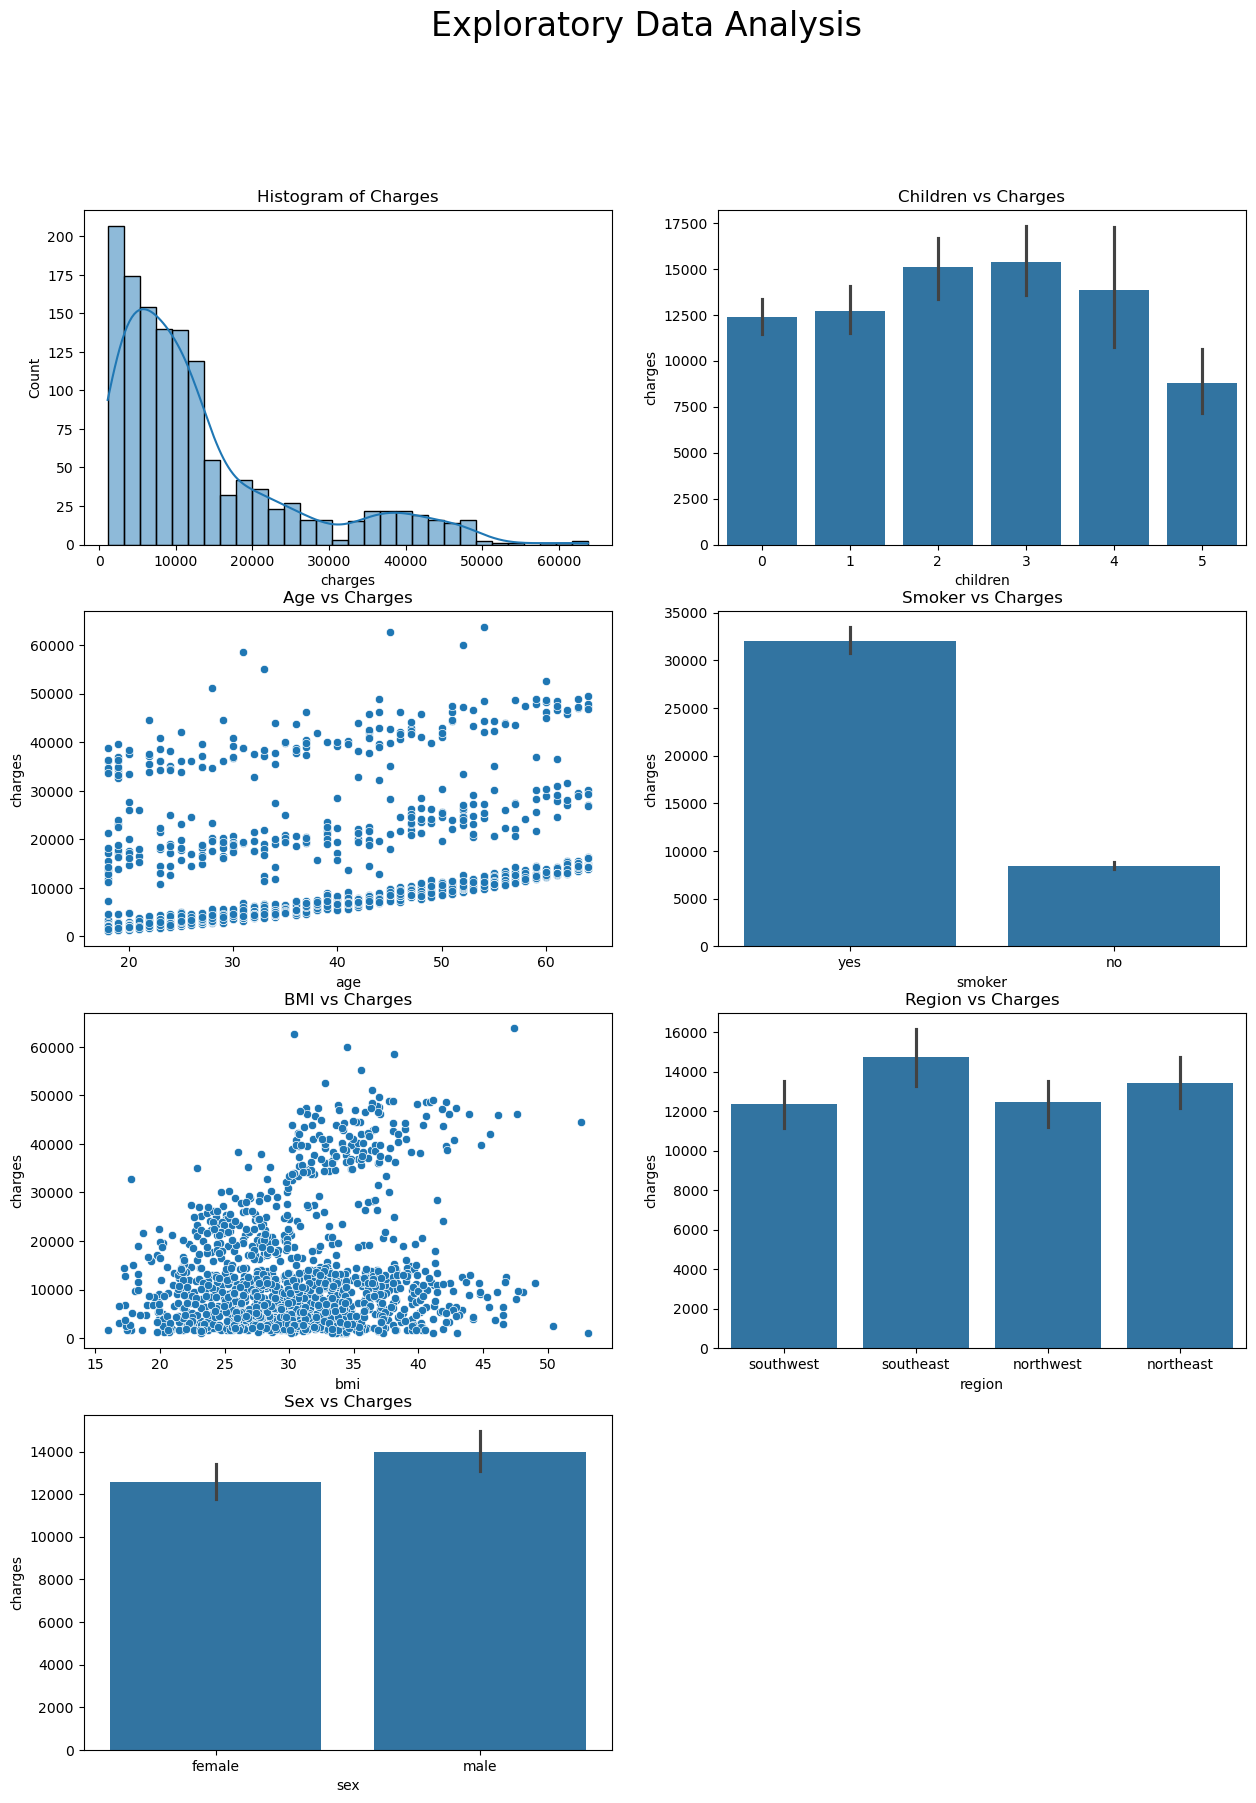

In [72]:
#Create Histogram and Scatter Plot

#Create Canvas
plt.figure(figsize = (15,20))
plt.suptitle('Exploratory Data Analysis', fontsize=24)
# Plot 1 taruh kiri atas
plt.subplot(4,2,1)
sns.histplot(df.charges, kde=True, bins=30)
plt.title('Histogram of Charges')

#plot 2 taruh kanan atas
plt.subplot(4,2,2)
sns.barplot(x='children', y='charges', data=df)
plt.title('Children vs Charges')

#plot 3 taruh kiri tengah
plt.subplot(4,2,3)
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')

#plot 4 taruh kanan tengah
plt.subplot(4,2,4)
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')

#plot 5 taruh kanan bawah
plt.subplot(4,2,5)
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')

#plot 6 taruh kanan bawah
plt.subplot(4,2,6)
sns.barplot(x='region', y='charges', data=df)
plt.title('Region vs Charges')

#plot 7 taruh kiri paling bawah
plt.subplot(4,2,7)
sns.barplot(x='sex', y='charges', data=df)
plt.title('Sex vs Charges')

plt.show()

>insight

# 5. Feature Engineering